In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import *

import seaborn as sns
#plotting parameters to make presentable plots
sns.set(font_scale=1.,style='white', palette='deep')#,rc = {'figure.figsize':(10,5)})#,font_style='bold') # font='SF Hello'

### TOSPDC Rate

In [2]:
# General calculation

# Wavelength parameters
lp = 520e-9 # 520nm
l1 = 3*lp # 1560nm
lw = 15e-9 # 50nm
spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

# Geometric parameters
meta_area = (180e-9+230e-9)*570e-9 # m^2
unit_cell = 680e-9**2 #m^2
beam_spot = pi*(3e-6)**2 # m^2

# THG Simulation Results

spdc_pump_flux = 10e13  # 1e13 W/m^2 = 1 GW/cm^2
TSFG_efficiency_f = 3e-33*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)

hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_f * spdc_pump_flux * beam_spot/meta_area

0.40467498793108564

In [3]:
# COMSOL Simulation results

pump_power_range = np.array([1.00E+10, 5.00E+12, 1.00E+13, 2.00E+13, 5.00E+13, 1.00E+14]) # W/m^2
thg_power_range_f = np.array([0.0036016, 4.50E+05, 3.60E+06, 2.88E+07, 4.50E+08, 3.60E+09]) # W/m^2
thg_power_range_b = np.array([0.0029394, 3.67E+05, 2.94E+06, 2.35E+07, 3.67E+08, 2.94E+09]) # W/m^2

conv_eff_f = thg_power_range_f/pump_power_range
conv_eff_b = thg_power_range_b/pump_power_range

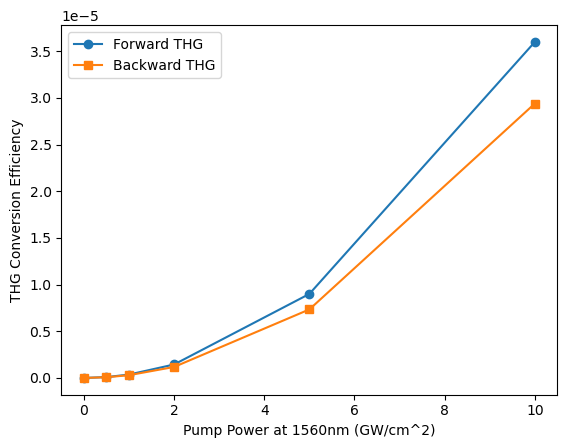

In [4]:
plt.plot(pump_power_range/1e13,conv_eff_f,'o-',label='Forward THG')
plt.plot(pump_power_range/1e13,conv_eff_b,'s-',label='Backward THG')
plt.legend()
plt.xlabel('Pump Power at 1560nm (GW/cm^2)')
plt.ylabel('THG Conversion Efficiency')         
plt.show()

(0.0, 0.5)

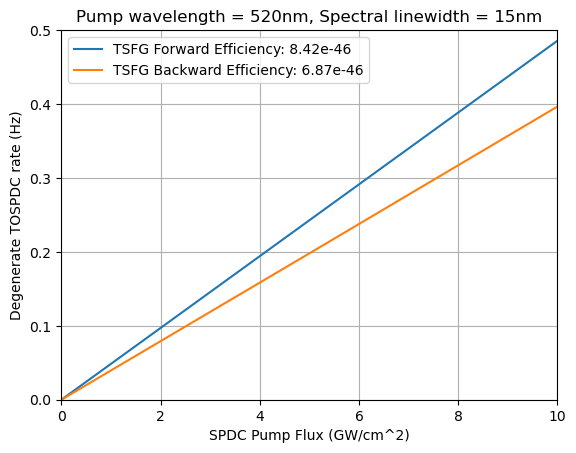

In [5]:
# Pump-dependent study 

# TSFG efficiency doesn't depend on pump power
TSFG_efficiency_f = thg_power_range_f / (pump_power_range)**3  * meta_area
TSFG_efficiency_b = thg_power_range_b / (pump_power_range)**3  * meta_area

def tospdc_deg(spdc_pump_flux,TSFG_efficiency):
    lp = 520e-9
    l1 = 3*lp
    lw = 15e-9 # 50nm
    spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2
    return hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency * spdc_pump_flux * beam_spot/meta_area

plt.plot(pump_power_range*1e-13,tospdc_deg(pump_power_range,TSFG_efficiency_f),label='TSFG Forward Efficiency: '+ str(np.format_float_scientific(TSFG_efficiency_f[0],2)) )
plt.plot(pump_power_range*1e-13,tospdc_deg(pump_power_range,TSFG_efficiency_b),label='TSFG Backward Efficiency: '+ str(np.format_float_scientific(TSFG_efficiency_b[0],2)) )
plt.grid()
plt.legend()
plt.xlabel('SPDC Pump Flux (GW/cm^2)')
plt.ylabel('Degenerate TOSPDC rate (Hz)')
plt.title('Pump wavelength = 520nm, Spectral linewidth = 15nm')
plt.xlim(0,10)
plt.ylim(0,0.5)

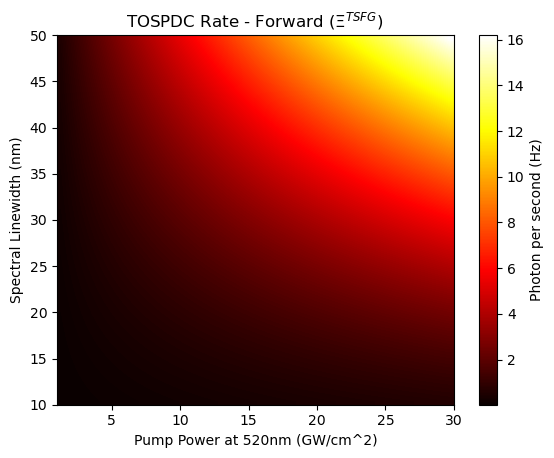

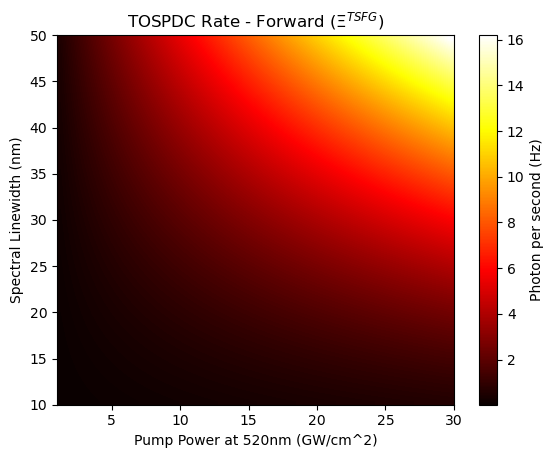

In [12]:
# Pump-dependent study at fixed THG efficiency

def tospdc_deg_f(spdc_pump_flux,lw):
    lp = 520e-9
    l1 = 3*lp
    # lw = 15e-9 # 50nm
    spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2
    TSFG_efficiency = 8.42e-46
    return hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency * spdc_pump_flux * beam_spot/meta_area

def tospdc_deg_b(spdc_pump_flux,lw):
    lp = 520e-9
    l1 = 3*lp
    # lw = 15e-9 # 50nm
    spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2
#    TSFG_efficiency = 6.87e-46
    TSFG_efficiency = 8.42e-46
    return hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency * spdc_pump_flux * beam_spot/meta_area


lw_range = np.linspace(10e-9, 50e-9)
spdc_pump_flux_range = np.linspace(1e13, 30e13)

tospdc_rate = []
for i in range(len(lw_range)):
    tospdc_rate.append(tospdc_deg_f(spdc_pump_flux_range,lw_range[i]))

tospdc_rate=np.array(tospdc_rate)
    
plt.imshow(tospdc_rate,extent=[1,30,10,50],aspect='auto',origin='lower',interpolation='bilinear',cmap='hot')
plt.colorbar(label='Photon per second (Hz)')#,ticks=[,4,8,12,16])
plt.xlabel('Pump Power at 520nm (GW/cm^2)')
plt.ylabel('Spectral Linewidth (nm)')
plt.title('TOSPDC Rate - Forward ($\Xi^{TSFG}$) ')
plt.show()

tospdc_rate_b = []
for i in range(len(lw_range)):
    tospdc_rate_b.append(tospdc_deg_b(spdc_pump_flux_range,lw_range[i]))
                       
tospdc_rate_b=np.array(tospdc_rate_b)                       

plt.imshow(tospdc_rate_b,extent=[1,30,10,50],aspect='auto',origin='lower',interpolation='bilinear',cmap='hot')
plt.colorbar(label='Photon per second (Hz)')
plt.xlabel('Pump Power at 520nm (GW/cm^2)')
plt.ylabel('Spectral Linewidth (nm)')
plt.title('TOSPDC Rate - Forward ($\Xi^{TSFG}$)')
plt.show()

Text(0.5, 0, 'Linewidth (nm)')

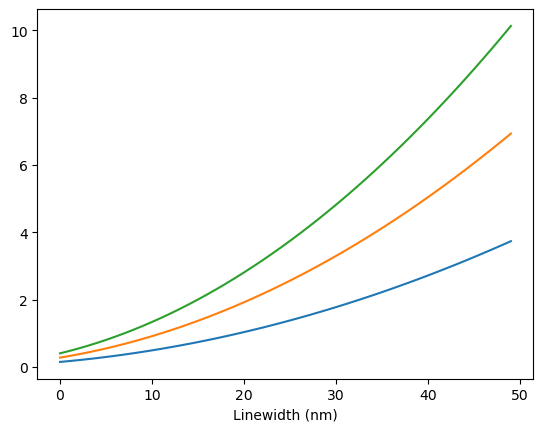

In [13]:
plt.plot(tospdc_rate[:,10])
plt.plot(tospdc_rate[:,20])
plt.plot(tospdc_rate[:,30])
plt.xlabel('Linewidth (nm)')

In [14]:
# Vary THG efficiency 

conv_efficiency_range = np.array([1e-7, 0.5e-6, 1e-6, 0.5e-5, 1e-5, 10e-5)


NameError: name 'spectral_lw' is not defined

In [59]:
thg_efficiency

7.011000000000001e-46

In [62]:
 4*pi**2 * thg_efficiency

2.7678318582414997e-44

In [78]:
beam_spot/meta_area

53.77137618467767

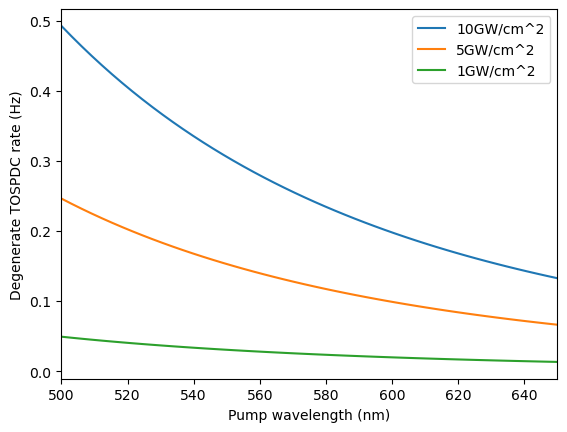

In [153]:
lp_range=np.linspace(500e-9,650e-9)
l1 = 3*lp_range
plt.plot(lp_range*1e9,tospdc_deg(lp_range,spdc_pump_flux*10),label='10GW/cm^2')
plt.plot(lp_range*1e9,tospdc_deg(lp_range,spdc_pump_flux*5),label='5GW/cm^2')
plt.plot(lp_range*1e9,tospdc_deg(lp_range,spdc_pump_flux),label='1GW/cm^2')
plt.xlabel('Pump wavelength (nm)')
plt.ylabel('Degenerate TOSPDC rate (Hz)')
plt.xlim(500,650)

plt.legend()

In [146]:
spdc_pump_flux/1e13

10.0

(0.0, 1.2)

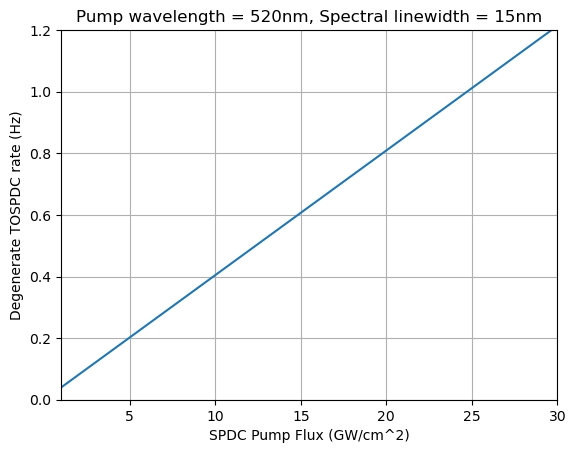

In [161]:
lp=520e-9
spdc_pump_flux = 1e13  # 1e13 W/m^2 = 1 GW/cm^2
spdc_pump_flux_range = np.linspace(spdc_pump_flux,spdc_pump_flux*30)
plt.plot(spdc_pump_flux_range*1e-13,tospdc_deg(lp,spdc_pump_flux_range))
plt.grid()
plt.xlabel('SPDC Pump Flux (GW/cm^2)')
plt.ylabel('Degenerate TOSPDC rate (Hz)')
plt.title('Pump wavelength = 520nm, Spectral linewidth = 15nm')
plt.xlim(1,30)
plt.ylim(0,1.2)

In [151]:
spdc_pump_flux_range

array([1.00000000e+13, 1.59183673e+13, 2.18367347e+13, 2.77551020e+13,
       3.36734694e+13, 3.95918367e+13, 4.55102041e+13, 5.14285714e+13,
       5.73469388e+13, 6.32653061e+13, 6.91836735e+13, 7.51020408e+13,
       8.10204082e+13, 8.69387755e+13, 9.28571429e+13, 9.87755102e+13,
       1.04693878e+14, 1.10612245e+14, 1.16530612e+14, 1.22448980e+14,
       1.28367347e+14, 1.34285714e+14, 1.40204082e+14, 1.46122449e+14,
       1.52040816e+14, 1.57959184e+14, 1.63877551e+14, 1.69795918e+14,
       1.75714286e+14, 1.81632653e+14, 1.87551020e+14, 1.93469388e+14,
       1.99387755e+14, 2.05306122e+14, 2.11224490e+14, 2.17142857e+14,
       2.23061224e+14, 2.28979592e+14, 2.34897959e+14, 2.40816327e+14,
       2.46734694e+14, 2.52653061e+14, 2.58571429e+14, 2.64489796e+14,
       2.70408163e+14, 2.76326531e+14, 2.82244898e+14, 2.88163265e+14,
       2.94081633e+14, 3.00000000e+14])

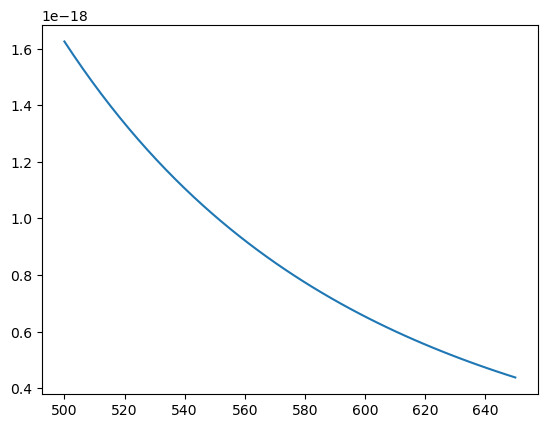

In [27]:
lp_range=np.linspace(500,650)
plt.plot(lp_range,lp_range**4/((3*lp_range)**9))

SPDC AlGaAs Nanoantenna

$$ \frac{dN}{dt} = 2 \pi \frac{c \Delta \lambda_s}{\lambda_s^2}\frac{\lambda_p^4}{\lambda_s^3 \lambda_i^3} \Xi_{avg}^{SFG} \Phi_p$$

$$ \Phi_p = \frac{P_{pump,SPDC/disk}}{A_{pump,SPDC}} $$

$$ P_{pump,SPDC/disk} = P_{pump,SPDC} \times P_{mode \%}^{pump,SPDC} $$


In [43]:
P_pump_SPDC = 2.2e-6 # 2.2mW
P_mode_pumpSPDC = 0.44 # 44%
r_disk = 215e-9 # 215nm
A_pump_disk = pi*(r_disk**2)

Phi_p = P_pump_SPDC * P_mode_pumpSPDC / A_pump_disk
print('Pump flux (W/m^2): %d' %(Phi_p))

Pump flux (W/m^2): 6665742


In [44]:
l_pump = 770e-9 #770nm
l_s = 1520e-9 #1520nm
l_i = 1560e-9 #1560nm
bandwidth = 150e-9 #150nm
SFG_efficiency = 1.8e-5 
beam_spot = pi*2e-6**2

2*pi*c*bandwidth/(l_s**2) * (l_pump**4)/(l_s**3 * l_i**3)  * SFG_efficiency * Phi_p

3.868869368651486e+26

In [35]:
l_pump**4/(l_s**3 * l_i**3)

1.452201204121882e-13

### Laser Power Analysis

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
#Peak_pow = 5.5e13 
#Ave_pow = 30e-3 
#Beam_area = pi*(10e-6)**2

#RepRatexPulseWidth = Ave_pow/(Peak_pow*Beam_area)

def calcPeakPower(Ave_pow):
    # Watts per m^2
    pi=3.14
    RepRate = 80e6
    PulseWidth = 200e-15
    Beam_area = 3.14*(1e-6)**2
    return Ave_pow/(RepRate*PulseWidth*Beam_area)

def calcPeakFluence(Ave_pow,BeamRadius):
    # Joules per m^2
    pi=3.14
    RepRate = 80e6
    PulseWidth = 80e-15
    Beam_area = 3.14*(BeamRadius)**2
    return Ave_pow/(RepRate*Beam_area)

def calcBandwidth(PulseWidth,lda0):
    delNu = 0.44/PulseWidth
    delLambda = delNu*(lda0**2)/c
    return delLambda

In [10]:
calcPeakPower(50e-3)*200e-15

199.04458598726117

In [26]:
# Joules per cm^2
calcPeakFluence(2e-3)/(100**2)

3.184713375796178e-05

In [76]:
array_2d=[]
power_range = np.linspace(0.0e-3,2,100)
radius_range = np.linspace(2e-6,5e-6)


for radius in radius_range:
    peak_fluence = calcPeakFluence(power_range,radius)/(100**2)
    array_2d.append(peak_fluence)

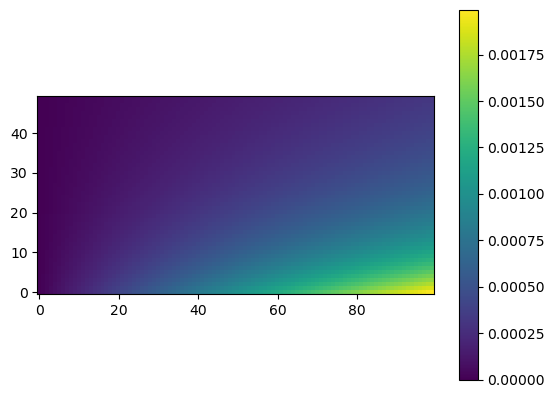

In [69]:
plt.imshow(array_2d,origin='lower')
plt.colorbar()

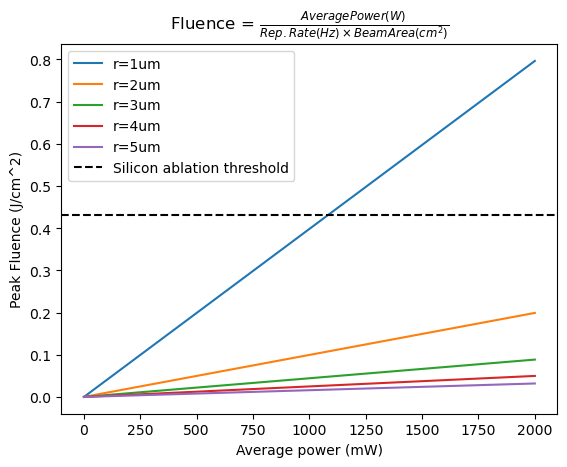

In [80]:
plt.plot(power_range*1e3, calcPeakFluence(power_range,1e-6)/(100**2),label='r=1um')
plt.plot(power_range*1e3, calcPeakFluence(power_range,2e-6)/(100**2),label='r=2um')
plt.plot(power_range*1e3, calcPeakFluence(power_range,3e-6)/(100**2),label='r=3um')
plt.plot(power_range*1e3, calcPeakFluence(power_range,4e-6)/(100**2),label='r=4um')
plt.plot(power_range*1e3, calcPeakFluence(power_range,5e-6)/(100**2),label='r=5um')
plt.axhline(0.43,linestyle='--',color='k',label='Silicon ablation threshold')
plt.xlabel('Average power (mW)')
plt.ylabel('Peak Fluence (J/cm^2)')
plt.title(r'Fluence = $\frac{Average Power (W)}{Rep. Rate (Hz)\times Beam Area (cm^2)}$')
plt.legend()

In [75]:
# Average power (W) required for Silicon laser ablation (0.43J/cm^2) at 80MHz repetition rate and 1um beam radius

0.43*3.14*1e-6**2 * 100**2 * 80e6

1.08016

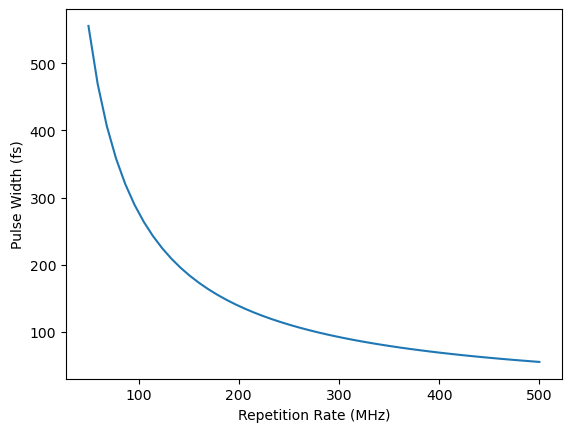

In [124]:
rep_rate_range = np.linspace(50e6,500e6)
plt.plot(rep_rate_range*1e-6,RepRatexPulseWidth*1e15/rep_rate_range)
plt.xlabel('Repetition Rate (MHz)')
plt.ylabel('Pulse Width (fs)')
plt.show()

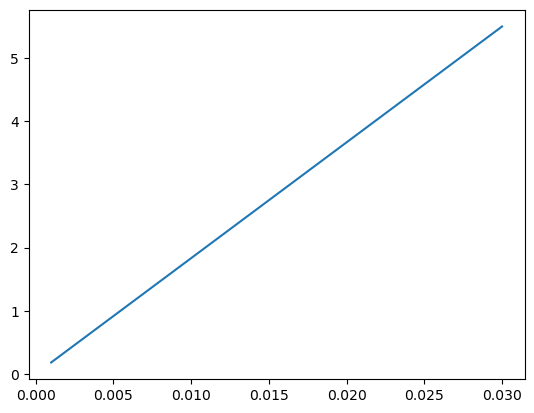

In [128]:
ave_pow_range = np.linspace(1e-3,30e-3)
plt.plot(ave_pow_range,calcPeakPower(ave_pow_range)/1e13)

### Radiative vs Parasitic Losses

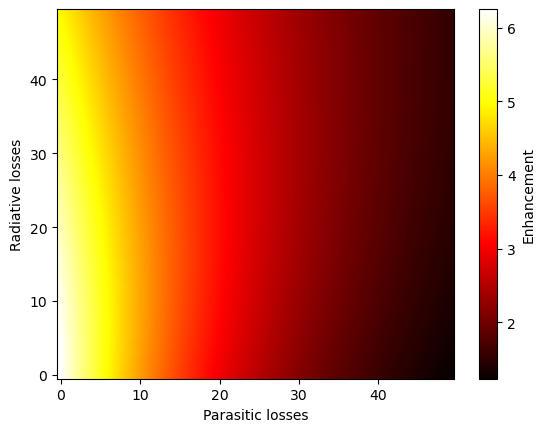

In [44]:

gamma_rad = np.linspace(0.1, 0.2)
gamma_par = np.linspace(0.1, 0.2)

enhancement = []
for i in range(len(gamma_par)):
    enhancement.append(gamma_rad**2/(gamma_rad+gamma_par[i])**4)

enhancement2=np.array(enhancement)
enhancement3=np.transpose(enhancement2)
    
plt.imshow(enhancement3,origin='lower',interpolation='bilinear',cmap='hot',aspect='auto')#,extent=[0.1,1,0.1,0.2],)
#plt.plot(gamma_par,gamma_rad/(gamma_rad[25]+gamma_par)**2,label='%0.3f' %(gamma_rad[25]))
#plt.plot(gamma_par,gamma_rad/(gamma_rad[30]+gamma_par)**2,label='%0.3f' %(gamma_rad[30]))
#plt.legend()
plt.colorbar(label='Enhancement')
plt.ylabel('Radiative losses')
plt.xlabel('Parasitic losses')
plt.show()

In [52]:
(0.315/80e-15)/1e12

3.9375

In [59]:
(c/830e-9)/(3.9375e12)

91.73224953145917

In [61]:
35*2.81

98.35000000000001

### TOSPDC rate with metasurface parameters

In [87]:
523.3*3

1569.8999999999999

In [106]:
# General calculation

# Wavelength parameters
lp = 523.3e-9 # 520nm
l1 = 3*lp # 1560nm
lw = 4e-9 # 50nm
spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

# Geometric parameters
meta_area = (160e-9+230e-9)*570e-9 # m^2
unit_cell = 680e-9**2 #m^2
beam_spot = pi*(5e-6)**2 # m^2

# THG Simulation Results

spdc_pump_flux = 1.6e13  # 1e13 W/m^2 = 1 GW/cm^2
TSFG_efficiency_f = 3e-31*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)

hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency_f * spdc_pump_flux * beam_spot/meta_area

1.208188753975211

In [3]:
import pandas as pd
results = pd.read_excel('COMSOL Simualtion Data/Lorentzian_Fit.xlsx',index_col=None)
results=results.drop([8,9])
results

,S2,S1,dS,Asymmetry,Peak1,Linewidth1,Q-factor1,Qf1-err,Peak2,Linewidth2,...,Qf2-err,THGF1,THGF2,THGB1,THGB2,FE1_Pump,FE2_pump,FE1_THG,FE2_THG,E0
0,230,140,90,0.391304,1510,5.0,302,NaN,1555,6.0,...,NaN,0.000011,2.450000e-05,2.200000e-06,4.000000e-06,10.814,8.5516,0.2528,0.1714,86802000
1,230,150,80,0.347826,1510,4.5,335,41.0,1556,5.6,...,26.0,0.000010,2.750000e-05,1.600000e-05,1.000000e-05,12.060,9.1400,0.3357,0.2463,86802000
2,230,160,70,0.304348,1529,6.1,252,27.0,1570,4.4,...,26.0,0.000008,3.500000e-05,1.200000e-05,1.200000e-05,11.192,9.6300,0.2503,0.2800,86802000
3,230,170,60,0.260870,1545,6.5,236,24.0,1582,3.4,...,11.0,0.000004,5.000000e-06,8.000000e-06,1.000000e-06,10.665,9.7870,0.1932,0.2620,86802000
4,230,180,50,0.217391,1560,5.7,275,18.0,1593,2.1,...,82.0,0.000003,3.500000e-06,4.000000e-07,1.000000e-06,10.405,9.5700,0.1971,0.2148,86802000
5,230,190,40,0.173913,1571,4.7,335,17.0,1603,2.0,...,229.0,0.000009,5.000000e-07,6.000000e-07,1.000000e-06,10.680,9.0130,0.2037,0.1386,86802000
6,230,200,30,0.130435,1581,3.2,486,19.0,1611,2.2,...,937.0,0.000020,5.000000e-07,3.500000e-06,5.000000e-07,10.550,7.8000,0.1700,0.0853,86802000
7,230,210,20,0.086957,1589,2.4,641,24.0,1619,1.0,...,1103.0,0.000008,2.500000e-07,1.400000e-06,2.000000e-07,8.670,6.7300,0.0973,0.0133,86802000


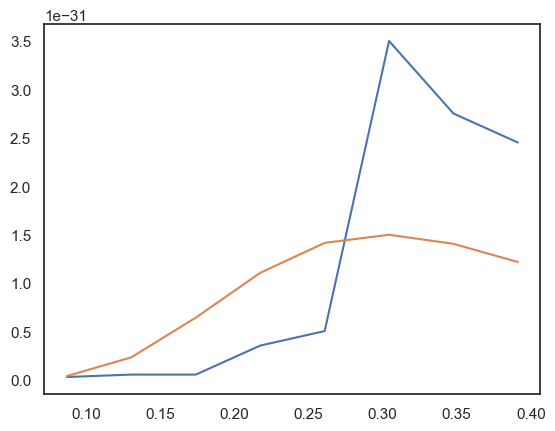

In [4]:
def THG_enhancement(alpha,alpha_opt,Qpar):
    #alpha_opt=0.3
    alpha_p = alpha**2 / alpha_opt**2
    return Qpar**3 * (alpha_p/(alpha_p+1)**2)**3 

I0=1e13 
TSFG_efficiency = results['THGF2'] /I0**2
scaling_factor = np.average(TSFG_efficiency/THG_enhancement(results['Asymmetry'],0.3,1365))

plt.plot(results['Asymmetry'],TSFG_efficiency)
plt.plot(results['Asymmetry'],scaling_factor*THG_enhancement(results['Asymmetry'],0.3,1365))

In [10]:

def THG_enhancement_scaled(alpha,Q0,Qnr):
    alpha_opt=np.sqrt(Q0/Qnr)
    alpha_p = alpha**2 / alpha_opt**2
    return Qnr**3 * (alpha_p/(alpha_p+1)**2)**3 * scaling_factor

def tospdc_meta(alpha,Q0,Qnr):
    # Wavelength parameters
    l1 = (-462.5*alpha**2 + 1617.16)*1e-9
    lp = l1/3 # 520nm
    #l1 = 3*lp # 1560nm
    lw = 15e-9 # 50nm
    spectral_lw = 4/3 * (2*pi*c*lw/(l1**2))**2 # s^-2

    # Geometric parameters
    meta_area = (160e-9+230e-9)*570e-9 # m^2
    unit_cell = 680e-9**2 #m^2
    beam_spot = pi*(3e-6)**2 # m^2

    # THG Simulation Results

    spdc_pump_flux = 4*1e13  # 1e13 W/m^2 = 1 GW/cm^2
    #TSFG_efficiency_f = 3e-33*meta_area # m^2 / (W/m^2)^2 (the same for all pump power)
    TSFG_efficiency = THG_enhancement_scaled(alpha,Q0,Qnr)

    return hbar*c/(2*pi) * lp**4/(l1**9) * spectral_lw * 4*pi**2 * TSFG_efficiency * spdc_pump_flux * beam_spot

In [11]:
Q0=8
Qnr=200
tospdc_meta(0.2,Q0,Qnr)

0.005096107761387733

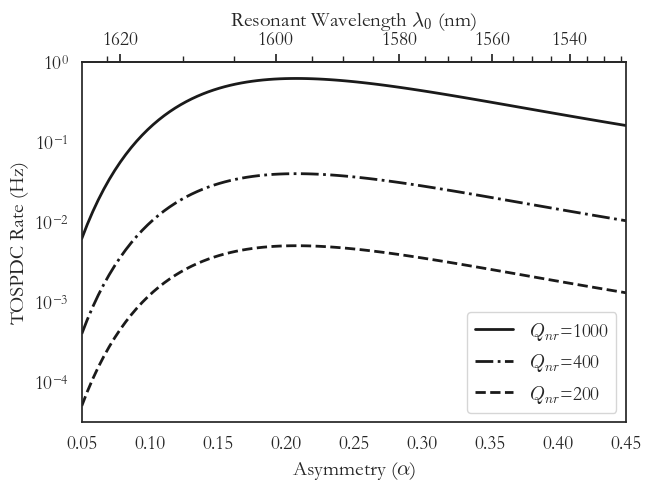

In [86]:
sns.set(font_scale=1.25,style='white', palette='deep',font='Garamond')

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
from matplotlib.ticker import AutoMinorLocator

asy_range=np.linspace(0.05,0.45,100)

def asytopeak(asy):
    return (-462.5*asy**2 + 1617.16)

def peaktoasy(peak):
    return np.sqrt(abs((peak-1617.16)/(-462.5)))

fig, ax = plt.subplots(layout='constrained')
plt.semilogy(asy_range,tospdc_meta(asy_range,Q0,200),'k--',label=r'$Q_{nr}$=200',linewidth=2.0)
plt.semilogy(asy_range,tospdc_meta(asy_range,Q0*2,400),'k-.',label=r'$Q_{nr}$=400',linewidth=2.0)
plt.semilogy(asy_range,tospdc_meta(asy_range,Q0*5,1000),'k-',label=r'$Q_{nr}$=1000',linewidth=2.0)
plt.legend(reverse=True)
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('TOSPDC Rate (Hz)')
plt.xlim(0.05,0.45)

secax = ax.secondary_xaxis('top', functions=(asytopeak, peaktoasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'Resonant Wavelength $\lambda_{0}$ (nm)')
plt.savefig('TOSPDC_meta.png',dpi=200,bbox_inches='tight')
plt.show()

In [41]:
np.log(2)

0.6931471805599453

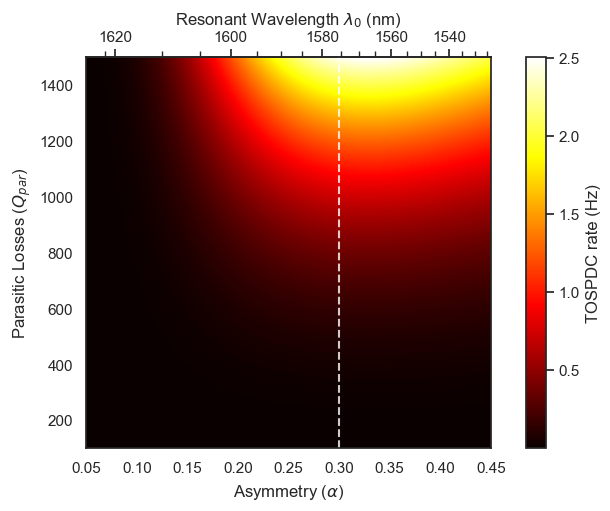

In [145]:

Qpar_range=np.linspace(100,1500,100)

tospdc_rate_list = []
for i in range(len(Qpar_range)):
    tospdc_rate_list.append(tospdc_meta(asy_range,0.3,Qpar_range[i]))

tospdc_rate_list2=np.array(tospdc_rate_list)
#tospdc_rate_list3=np.transpose(tospdc_rate_list2)

fig, ax = plt.subplots(layout='constrained',figsize=(6,5))
plt.imshow(tospdc_rate_list2,origin='lower',interpolation='bilinear',cmap='hot',aspect='auto',extent=[0.05,0.45,100,1500],)
plt.axvline(0.3,color='white',alpha=0.8,linestyle='--')
#plt.plot(gamma_par,gamma_rad/(gamma_rad[25]+gamma_par)**2,label='%0.3f' %(gamma_rad[25]))
#plt.plot(gamma_par,gamma_rad/(gamma_rad[30]+gamma_par)**2,label='%0.3f' %(gamma_rad[30]))
#plt.legend()
plt.colorbar(label='TOSPDC rate (Hz)')
plt.ylabel(r'Parasitic Losses ($Q_{par}$)')
plt.xlabel(r'Asymmetry ($\alpha$)')

secax = ax.secondary_xaxis('top', functions=(asytopeak, peaktoasy))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r'Resonant Wavelength $\lambda_{0}$ (nm)')
plt.show()

plt.show()

(0.0, 2.5)

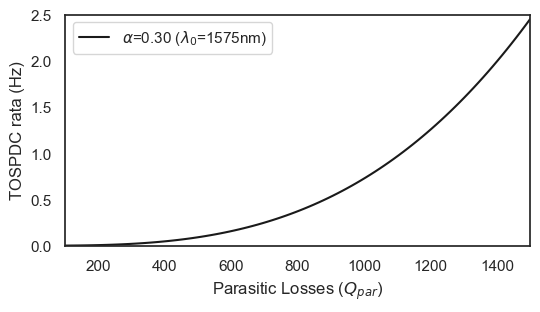

In [162]:
Qpar_range=np.linspace(100,1500,100)
plt.figure(figsize=(6,3))
plt.plot(Qpar_range,tospdc_meta(0.3,0.3,Qpar_range),label=r'$\alpha$=0.30 ($\lambda_0$=1575nm)',color='k')
plt.legend()
plt.xlabel(r'Parasitic Losses ($Q_{par}$)')
plt.ylabel('TOSPDC rata (Hz)')
plt.xlim(100,1500)
plt.ylim(0,2.5)

In [160]:
asytopeak(0.3)/3

525.1783333333334

(0.0, 2.5)

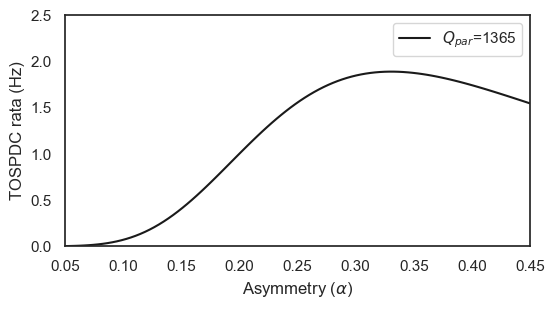

In [163]:
Qpar_range=np.linspace(100,1500,100)
plt.figure(figsize=(6,3))
plt.plot(asy_range,tospdc_meta(asy_range,0.3,1365),label=r'$Q_{par}$=1365',color='k')
plt.legend()
plt.xlabel(r'Asymmetry ($\alpha$)')
plt.ylabel('TOSPDC rata (Hz)')
plt.xlim(0.05,0.45)
plt.ylim(0,2.5)